In [23]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import pandas as pd
import scipy.stats as sts

In [2]:
# Files to load
city_df = pd.read_csv('resources/city_data.csv')
ride_df = pd.read_csv('resources/ride_data.csv')

city_df.head(10)
#ride_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Get the columns and the rows that are not null.
city_df.count()
city_df.isnull().sum()
# Get the data types of each column
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [4]:
# Get the unique values of the type of city.
city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [5]:
# Get the numner of data points from the Urban cities.
print(f"Urban: {sum(city_df['type'] == 'Urban')}")
print(f"Suburban: {sum(city_df['type'] == 'Suburban')}")
print(f"Rural: {sum(city_df['type'] == 'Rural')}")

Urban: 66
Suburban: 36
Rural: 18


In [6]:
# Get the columns and rows that are not null.
ride_df.count()
ride_df.isnull().sum()
# Get the data types of each column
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
# Combine the data into a single dataset
data_df = pd.merge(ride_df, city_df, how='left', on=['city','city'])
data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [42]:
# Create the individual city type DataFrames.
urban_df = data_df[data_df['type'] == 'Urban']
suburban_df = data_df[data_df['type'] == 'Suburban']
rural_df = data_df[data_df['type'] == 'Rural']

In [9]:
# Get the number of rides for each city type
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']

In [43]:
# Get the average fare for each city type
urban_fare = urban_df.groupby(['city']).mean()['fare']
suburban_fare = suburban_df.groupby(['city']).mean()['fare']
rural_fare = rural_df.groupby(['city']).mean()['fare']

In [11]:
# Get the average number of drivers for each city type
urban_driver_count = urban_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_df.groupby(['city']).mean()['driver_count']

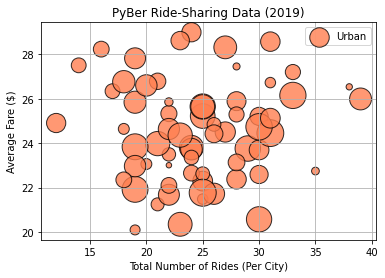

In [12]:
# Build the scatter plots for each city typ
plt.scatter(urban_ride_count, urban_fare, s=urban_driver_count*10, color = 'coral',
           alpha = 0.8, edgecolor = 'black', linewidths = 1, label = 'Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

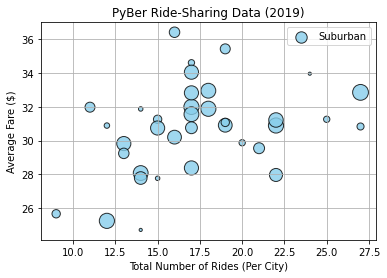

In [13]:
# Build the scatter plots for each city typ
plt.scatter(suburban_ride_count, suburban_fare, s=suburban_driver_count*10, color = 'skyblue',
           alpha = 0.8, edgecolor = 'black', linewidths = 1, label = 'Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

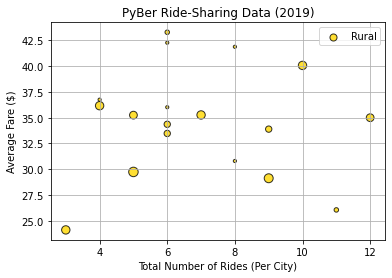

In [14]:
# Build the scatter plots for each city typ
plt.scatter(rural_ride_count, rural_fare, s=rural_driver_count*10, color = 'gold',
           alpha = 0.8, edgecolor = 'black', linewidths = 1, label = 'Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

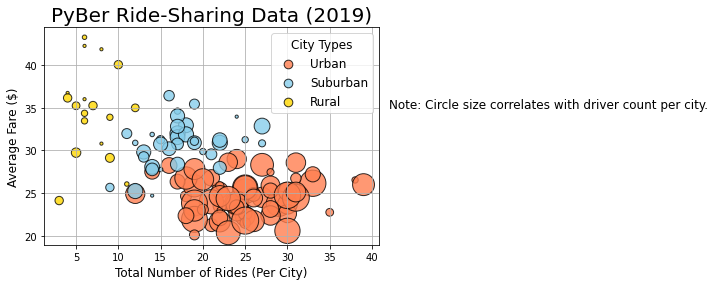

In [15]:
# Build the scatter plots for each city type
plt.scatter(urban_ride_count, urban_fare, s=urban_driver_count*10, color = 'coral',
           alpha = 0.8, edgecolor = 'black', linewidths = 1, label = 'Urban')

plt.scatter(suburban_ride_count, suburban_fare, s=suburban_driver_count*10, color = 'skyblue',
           alpha = 0.8, edgecolor = 'black', linewidths = 1, label = 'Suburban')

plt.scatter(rural_ride_count, rural_fare, s=rural_driver_count*10, color = 'gold',
           alpha = 0.8, edgecolor = 'black', linewidths = 1, label = 'Rural')

# Adding graph titles, etc
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Adding the legend
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')

# Save the figure
plt.savefig('analysis/Fig1.png')

plt.show()

In [17]:
# Get summary statistics.
print(urban_df.describe())
print(suburban_df.describe())
print(rural_df.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.8878

In [19]:
# Get summary statistics
print(urban_ride_count.describe())
print(suburban_ride_count.describe())
print(rural_ride_count.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [20]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [21]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [22]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [24]:
# Calculate the measures of central tendency for the ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [29]:
# Calculate the measures of central tendency for the ride count for suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [31]:
# Calculate the measures of central tendency for the ride count for rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [39]:
# Get the fares for the urban cities.
urbanfare = urban_df['fare']

# Calculate the measures of central tendency for the average fare for urban cities
mean_urbanfare = np.mean(urbanfare)
print(f"The mean for the fare for urban trips is ${mean_urbanfare:.2f}.")

median_urbanfare = np.median(urbanfare)
print(f"The median for the fare for urban trips is ${median_urbanfare:.2f}.")

mode_urbanfare = sts.mode(urbanfare)
print(f"The mode for the fare for urban trips is {mode_urbanfare}.")

The mean for the fare for urban trips is $24.53.
The median for the fare for urban trips is $24.64.
The mode for the fare for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [40]:
# Get the fares for the suburban cities.
suburbanfare = suburban_df['fare']

# Calculate the measures of central tendency for the average fare for urban cities
mean_suburbanfare = np.mean(suburbanfare)
print(f"The mean for the fare for suburban trips is ${mean_suburbanfare:.2f}.")

median_suburbanfare = np.median(suburbanfare)
print(f"The median for the fare for suburban trips is ${median_suburbanfare:.2f}.")

mode_suburbanfare = sts.mode(suburbanfare)
print(f"The mode for the fare for suburban trips is {mode_suburbanfare}.")

The mean for the fare for suburban trips is $30.97.
The median for the fare for suburban trips is $30.75.
The mode for the fare for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [41]:
# Get the fares for the urban cities.
ruralfare = rural_df['fare']

# Calculate the measures of central tendency for the average fare for urban cities
mean_ruralfare = np.mean(ruralfare)
print(f"The mean for the fare for rural trips is ${mean_ruralfare:.2f}.")

median_ruralfare = np.median(ruralfare)
print(f"The median for the fare for rural trips is ${median_ruralfare:.2f}.")

mode_ruralfare = sts.mode(ruralfare)
print(f"The mode for the fare for rural trips is {mode_ruralfare}.")

The mean for the fare for rural trips is $34.62.
The median for the fare for rural trips is $37.05.
The mode for the fare for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Get the driver count data from the urban cities
urban_driver = urban_df['driver_count']

# Calculate the measures of central tendency for the average fare for urban cities
mean_urban_driver = np.mean(urban_driver)
print(f"The mean for the number of drivers for urban trips is {mean_urban_driver:.0f}.")

median_urban_driver = np.median(urban_driver)
print(f"The median for the number of drivers for urban trips is {median_urban_driver:.0f}.")

mode_urban_driver = sts.mode(urban_driver)
print(f"The mode for the number of drivers for urban trips is {mode_urban_driver}.")

The mean for the number of drivers for urban trips is 37.
The median for the number of drivers for urban trips is 37.
The mode for the number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [47]:
# Get the driver count data from the urban cities
suburban_driver = suburban_df['driver_count']

# Calculate the measures of central tendency for the average fare for urban cities
mean_suburban_driver = np.mean(suburban_driver)
print(f"The mean for the number of drivers for suburban trips is {mean_suburban_driver:.0f}.")

median_suburban_driver = np.median(suburban_driver)
print(f"The median for the number of drivers for suburban trips is {median_suburban_driver:.0f}.")

mode_suburban_driver = sts.mode(suburban_driver)
print(f"The mode for the number of drivers for suburban trips is {mode_suburban_driver}.")

The mean for the number of drivers for suburban trips is 14.
The median for the number of drivers for suburban trips is 16.
The mode for the number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [48]:
# Get the driver count data from the urban cities
rural_driver = rural_df['driver_count']

# Calculate the measures of central tendency for the average fare for urban cities
mean_rural_driver = np.mean(rural_driver)
print(f"The mean for the number of drivers for rural trips is {mean_rural_driver:.0f}.")

median_rural_driver = np.median(rural_driver)
print(f"The median for the number of drivers for rural trips is {median_rural_driver:.0f}.")

mode_rural_driver = sts.mode(rural_driver)
print(f"The mode for the number of drivers for rural trips is {mode_rural_driver}.")

The mean for the number of drivers for rural trips is 4.
The median for the number of drivers for rural trips is 4.
The mode for the number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


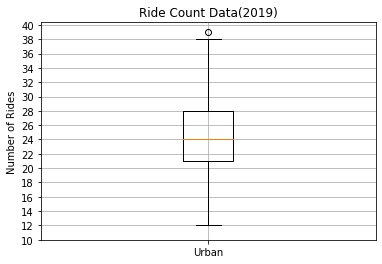

In [54]:
# Create a box and whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = ['Urban'])

# Add the labels
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,2))
ax.grid()
plt.show()

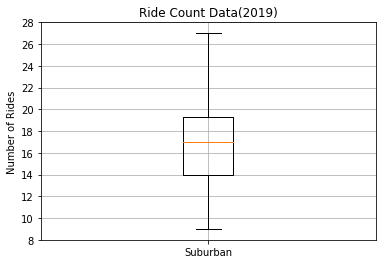

In [56]:
# Create a box and whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = ['Suburban'])

# Add the labels
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8,29,2))
ax.grid()
plt.show()

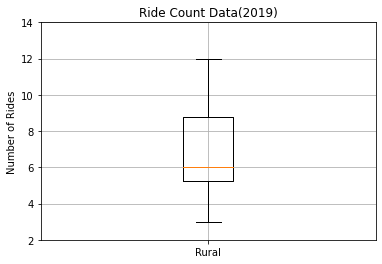

In [59]:
# Create a box and whisker plot for the urban cities ride count.
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = ['Rural'])

# Add the labels
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2,15,2))
ax.grid()
plt.show()

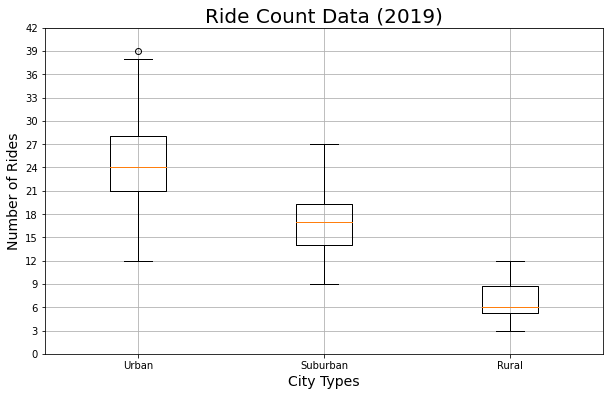

In [64]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ['Urban','Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,3))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig2.png')
plt.show()

In [71]:
# Find the outlier
urban_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_outlier} has the highest rider count.')

West Angela has the highest rider count.


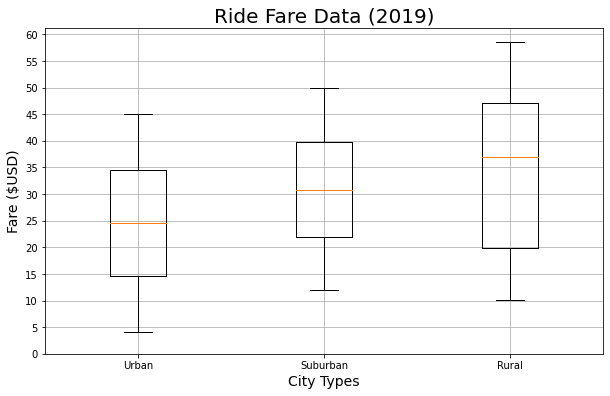

In [82]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ['Urban','Suburban','Rural']
fare_data = [urbanfare, suburbanfare, ruralfare]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,61,5))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig3.png')
plt.show()

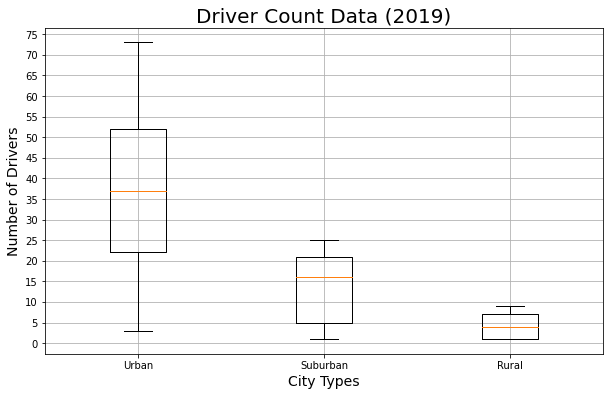

In [83]:
# Add all driver count data box-and-whisker plots to the same graph.
x_labels = ['Urban','Suburban','Rural']
driver_data = [urban_driver, suburban_driver, rural_driver]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_data, labels=x_labels)
ax.set_yticks(np.arange(0,76,5))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig4.png')
plt.show()

In [89]:
# Get the sum of the fares for each city type
fare_sum = data_df.groupby(['type']).sum()['fare']
fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [87]:
# Get the sum of the total fares
total_sum = data_df.sum()['fare']
total_sum

63538.64

In [95]:
# Get individual percentages
type_perc = fare_sum / total_sum * 100
type_perc

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

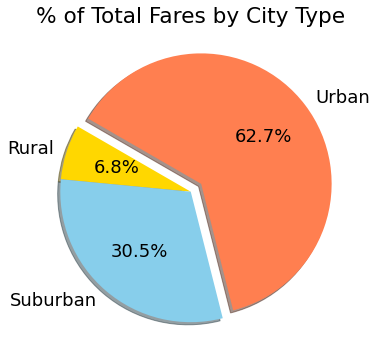

In [108]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_perc, labels = ['Rural','Suburban','Urban'],
        colors = ['gold','skyblue','coral'],
       shadow = True, startangle = 150, explode = [0,0,0.1],
       autopct='%1.1f%%')
plt.title('% of Total Fares by City Type')

# Change the default font size from 10 to 16
mpl.rcParams['font.size'] = 16

#Save Figure
plt.savefig('analysis/Fig5.png')

#Show Fig
plt.show()

In [118]:
# Find Total Rides percentage
ride_sum = data_df.groupby(['type']).count()['ride_id']

ride_sum_total = data_df['ride_id'].count()

ride_perc = ride_sum / ride_sum_total * 100

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

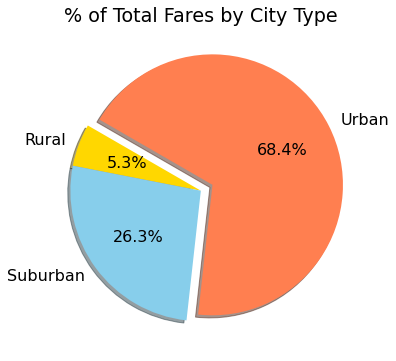

In [119]:
# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(ride_perc, labels = ['Rural','Suburban','Urban'],
        colors = ['gold','skyblue','coral'],
       shadow = True, startangle = 150, explode = [0,0,0.1],
       autopct='%1.1f%%')
plt.title('% of Total Fares by City Type')

# Change the default font size from 10 to 16
mpl.rcParams['font.size'] = 16

#Save Figure
plt.savefig('analysis/Fig6.png')

#Show Fig
plt.show()